# EDA PROJECT


## "COVID-19 DEATH RATE VS. POVERTY: DETAILED ANALISYS"

#### "The goal of this project is to analyse whether the ratio of higher deaths is related to countries with lower GDP per capita"


In [1]:
# Import necessary libraries
import os, sys

In [2]:
# Access to the path of the folder
path = os.path.dirname(os.getcwd())
sys.path.append(path)

## Data Mining and Data Wrangling

In [3]:
# Import .py file with the cleaned df
from utils_.mining_data_tb import *

In [4]:
# Show the information of each column (Non-Null, dtype, shape)
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61950 entries, 0 to 61949
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        61950 non-null  datetime64[ns]
 1   continent                   61950 non-null  object        
 2   country                     61950 non-null  object        
 3   median_age                  61950 non-null  float64       
 4   aged_65_older               61950 non-null  float64       
 5   aged_70_older               61950 non-null  float64       
 6   total_cases                 61950 non-null  float64       
 7   total_deaths                61950 non-null  float64       
 8   hospital_beds_per_thousand  61950 non-null  float64       
 9   gdp_per_capita              61950 non-null  float64       
 10  HDI                         61950 non-null  float64       
 11  deaths_ratio                61950 non-null  float64   

In [5]:
# Show the cleaned data
dtale.show(covid_data)

In [6]:
# Import functions of read, create and write
from utils_.folders_tb import *

In [7]:
# Store csv with the cleaned data
create_csv(covid_data, os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "cleaned.csv")
create_csv(covid_data, os.path.dirname(os.getcwd()) + os.sep + "src" + os.sep + "api" + os.sep + "static" + os.sep + "cleaned.csv")
# create_csv(covid_data,'../data/cleaned.csv')
# create_csv(covid_data, '../src/api/static/cleaned.csv')

In [8]:
# Import functions to create subdf
from utils_.create_df import *

In [9]:
# Gruop df by "country" --> Assign it to "covid_groupby"
covid_groupby = groupby_country(covid_data, "country")

In [10]:
covid_groupby

,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI,Poverty %
0,Asia,Afghanistan,18.6,2.581,1.337,96.082,3.918,63819.0,2751.0,4.310628,0.50,1803.987,0.511,0.00
1,Europe,Albania,38.0,13.188,8.643,78.169,21.831,132071.0,2436.0,1.844462,2.89,11803.431,0.795,1.10
2,Africa,Algeria,29.1,6.211,3.857,89.932,10.068,125693.0,3388.0,2.695456,1.90,13913.839,0.748,0.80
3,North America,Antigua and Barbuda,32.1,6.933,4.631,88.436,11.564,1251.0,42.0,3.357314,3.80,21490.943,0.778,0.00
4,South America,Argentina,31.9,11.198,7.441,81.361,18.639,3371508.0,71771.0,2.128751,5.00,18933.907,0.845,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,South America,Venezuela,29.0,6.614,3.915,89.471,10.529,217603.0,2428.0,1.115793,0.80,16745.022,0.711,0.00
151,Asia,Vietnam,32.6,7.150,4.718,88.132,11.868,4512.0,37.0,0.820035,2.60,6171.884,0.704,1.12
152,Asia,Yemen,20.3,2.922,1.583,95.495,4.505,6586.0,1297.0,19.693289,0.70,1479.147,0.470,18.11
153,Africa,Zambia,17.7,2.480,1.542,95.978,4.022,92520.0,1263.0,1.365110,2.00,3689.251,0.584,57.80


In [11]:
create_csv(covid_groupby,'../data/covid_groupby.csv')

In [12]:
# Show df grouped
dtale.show(covid_groupby)

### DATAFRAME SORTED BY GDP



In [13]:
# Creating df for each continent
africa = cases_continent(covid_groupby, "continent", "Africa")
asia = cases_continent(covid_groupby, "continent", "Asia")
europe = cases_continent(covid_groupby, "continent", "Europe")
north_america = cases_continent(covid_groupby, "continent", "North America")
oceania = cases_continent(covid_groupby, "continent", "Oceania")
south_america = cases_continent(covid_groupby, "continent", "South America")

In [14]:
# Take first and  last 5 values of each country
s_gdp_africa = sort_value(africa, "gdp_per_capita")
s_gdp_asia = sort_value(asia, "gdp_per_capita")
s_gdp_europe = sort_value(europe, "gdp_per_capita")
s_gdp_north_america = sort_value(north_america, "gdp_per_capita")
s_gdp_south_america = sort_value(south_america, "gdp_per_capita")
s_gdp_oceania = sort_value(oceania, "gdp_per_capita")

In [15]:
# Join DataFrame of each country in a df of world
s_gdp_world = concatenate_df(s_gdp_africa, s_gdp_asia, s_gdp_europe, s_gdp_north_america, s_gdp_south_america, s_gdp_oceania, "gdp_per_capita")

In [16]:
dtale.show(s_gdp_world)

### DATAFRAME SORTED BY HDI RANK

In [17]:
s_hdi_africa = sort_value(africa, "HDI")
s_hdi_asia = sort_value(asia, "HDI")
s_hdi_europe = sort_value(europe, "HDI")
s_hdi_north_america = sort_value(north_america, "HDI")
s_hdi_south_america = sort_value(south_america, "HDI")
s_hdi_oceania = sort_value(oceania, "HDI")

In [18]:
s_hdi_world = concatenate_df(s_hdi_africa, s_hdi_asia, s_hdi_europe, s_hdi_north_america, s_hdi_south_america, s_hdi_oceania, "HDI")

In [19]:
dtale.show(s_hdi_world)

### DATAFRAME SORTED BY POVERTY RATIO

In [20]:
s_poverty_africa = sort_value(africa, "Poverty %")
s_poverty_asia = sort_value(asia, "Poverty %")
s_poverty_europe = sort_value(europe, "Poverty %")
s_poverty_north_america = sort_value(north_america, "Poverty %")
s_poverty_south_america = sort_value(south_america, "Poverty %")
s_poverty_oceania = sort_value(oceania, "Poverty %")

In [21]:
s_poverty_world = concatenate_df(s_poverty_africa, s_poverty_asia, s_poverty_europe, s_poverty_north_america, s_poverty_south_america, s_poverty_oceania, "Poverty %") 

In [22]:
dtale.show(s_poverty_world)

### DATAFRAME SORTED BY DEATHS RATIO

In [23]:
s_deaths_africa = sort_value(africa, "deaths_ratio")
s_deaths_asia = sort_value(asia, "deaths_ratio")
s_deaths_europe = sort_value(europe, "deaths_ratio")
s_deaths_north_america = sort_value(north_america, "deaths_ratio")
s_deaths_south_america = sort_value(south_america, "deaths_ratio")
s_deaths_oceania = sort_value(oceania, "deaths_ratio")

In [24]:
s_deaths_world = concatenate_df(s_deaths_africa, s_deaths_asia, s_deaths_europe, s_deaths_north_america, s_deaths_south_america, s_deaths_oceania, "deaths_ratio")

In [25]:
dtale.show(s_deaths_world)

## VISUALIZATION

In [26]:
from utils_.visualization_tb import *

### HEATMAP

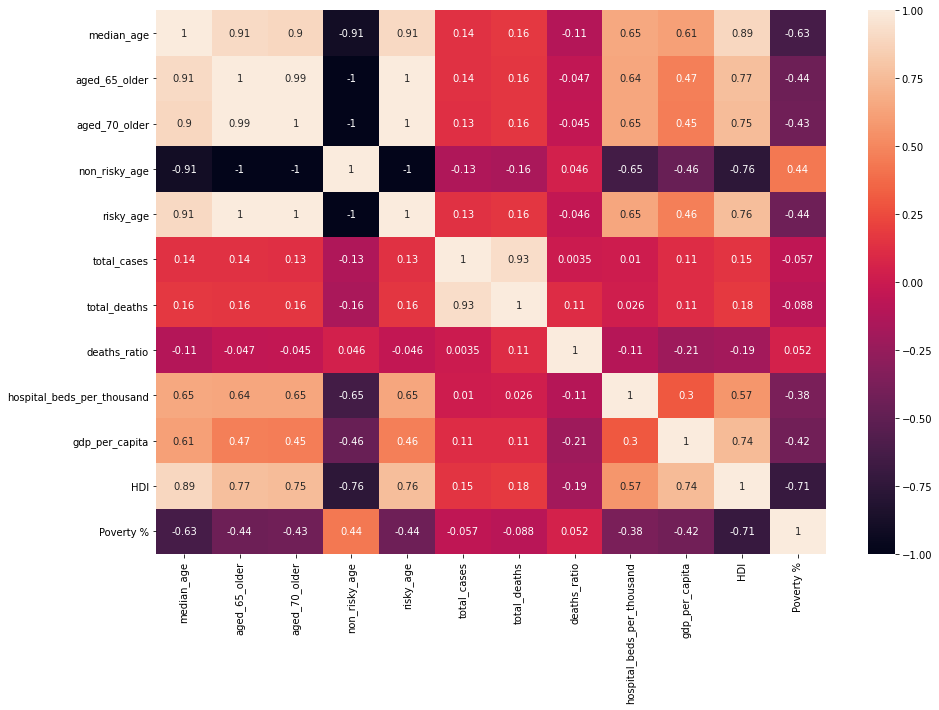

In [27]:
visualization_heatmap(covid_groupby)

In this heatmap we can observe that: 
- The correlation between deaths ratio and hospital beds per thousand is negative but not significative (- 0.11)
- The correlation between deaths ratio and gdp per capita is negative but not meaningful (- 0.21)
- The correlation between deaths ratio and HDI is negative but not meaningful (- 0.19)
- The correlation between deaths ratio and poverty % is positive but not meaningful (- 0.21)
- The correlation between HDI and median age is positive and meaningful, therefore, the higher HDI, the higher median age
- The correlation between HDI and hospital beds per thousand is positive as well


### MAPS

Show the incidence of total cases, total deaths, deaths ratio and poverty ratio all over the world by scatter points 

#### MAP OF GDP PER CAPITA

In [28]:
scatter_geo(covid_groupby, "gdp_per_capita", "gdp per capita", color="total_cases", size_max=15)

#### MAP OF TOTAL CASES

In [29]:
scatter_geo(covid_groupby, "total_cases", "total cases", color="total_deaths")

#### MAP OF TOTAL DEATHS

In [30]:
scatter_geo(covid_groupby, "total_deaths", "total deaths", color="total_deaths")

#### MAP OF DEATHS RATIO

In [31]:
scatter_geo(covid_groupby, "deaths_ratio", "deaths ratio", color="deaths_ratio")

#### MAP OF POVERTY RATIO

In [32]:
scatter_geo(covid_groupby, "Poverty %", "Poverty ratio", color="Poverty %")

### BOX PLOT

This type of graph shows the shape of the distribution, its central value, and its variability.

#### BOX PLOT GDP PER CAPITA



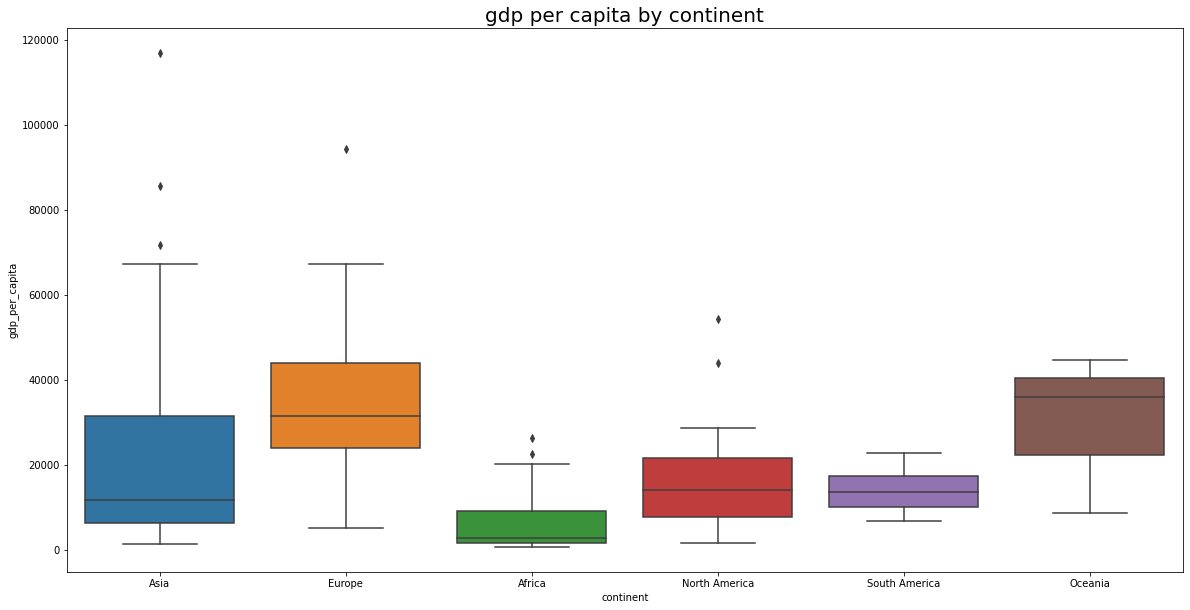

In [33]:
boxplot("continent","gdp_per_capita",covid_groupby, "gdp per capita by continent")

#### BOX PLOT POVERTY %

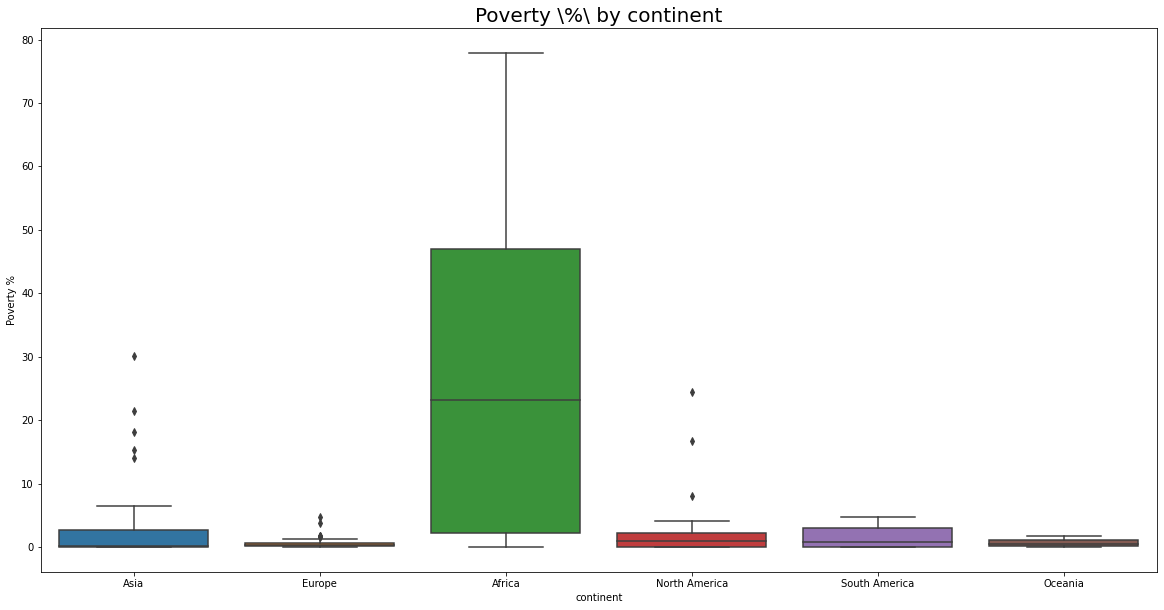

In [34]:
boxplot("continent","Poverty %",covid_groupby, "Poverty \%\ by continent")

#### BOX PLOT DEATHS RATIO

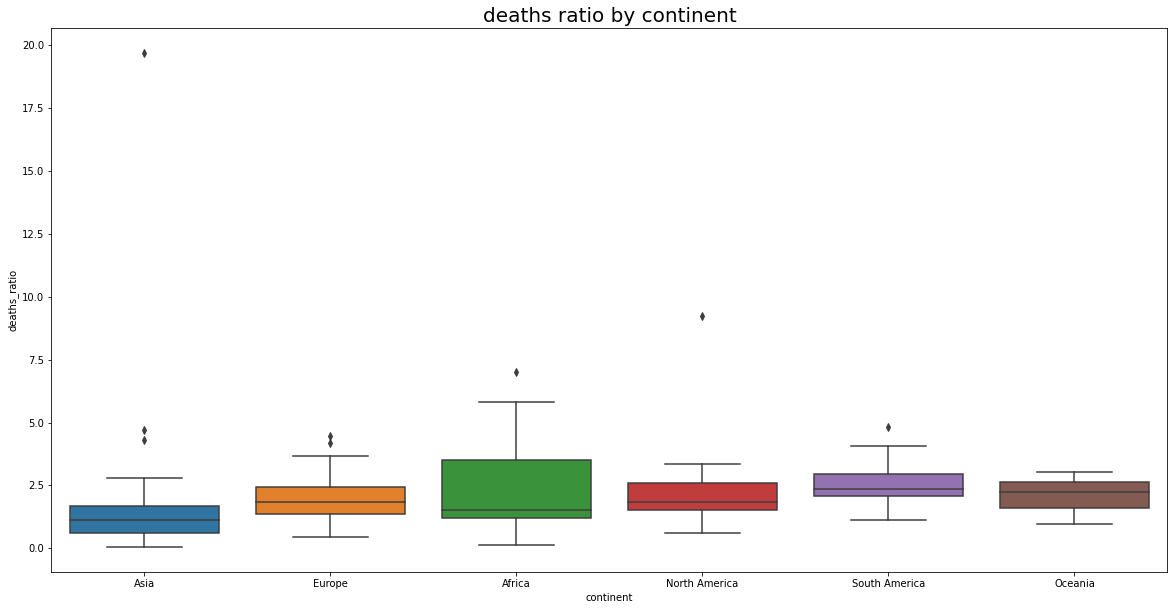

In [35]:
boxplot("continent","deaths_ratio",covid_groupby, "deaths ratio by continent")

### BAR PLOTS

#### WORLD

This graph compares gdp per capita and the deaths ratio sorted by gdp per capita of the world.
For the values we've selected the top five highest and lowest gdp per continent because if we select the top twenty highest and lowest of all world directly the comparation wouldn't be representative. 

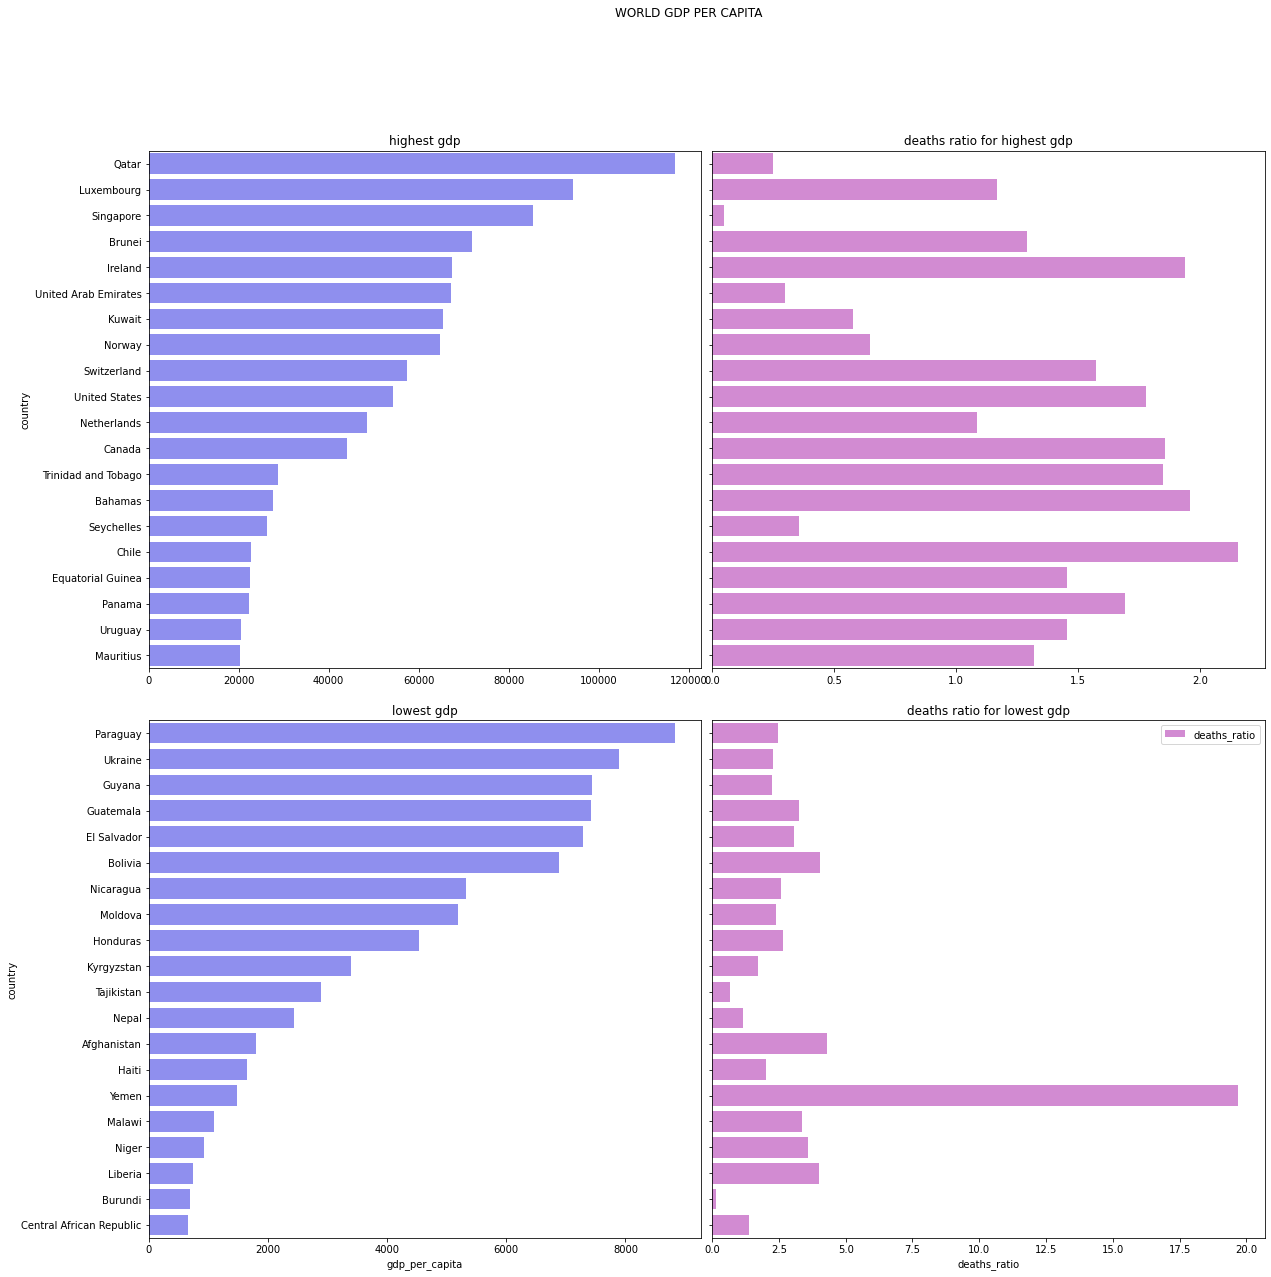

In [36]:
visualizacion_cuatro(s_gdp_world, 'WORLD GDP PER CAPITA', 'gdp_per_capita', 'deaths_ratio', 'country', "highest gdp", "deaths ratio for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", 20)

### BY CONTINENT

#### EUROPE

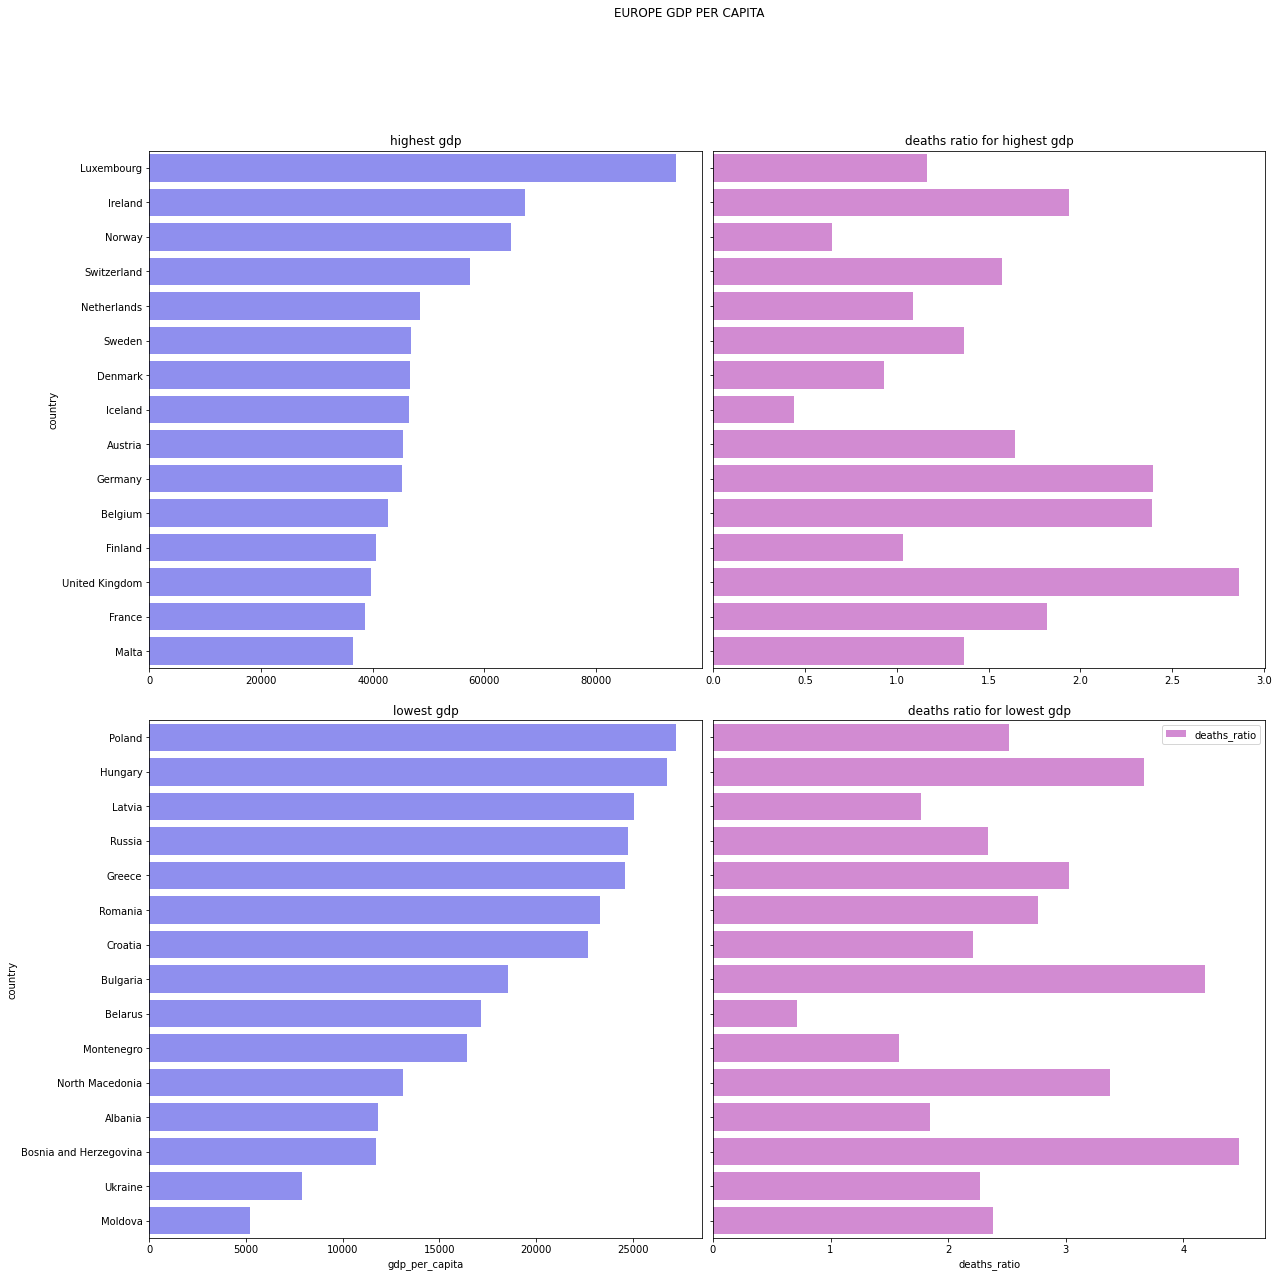

In [37]:
visualizacion_cuatro(europe.sort_values("gdp_per_capita", ascending=False), 'EUROPE GDP PER CAPITA', 'gdp_per_capita', 'deaths_ratio', 'country', "highest gdp", "deaths ratio for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", 15)

#### ASIA

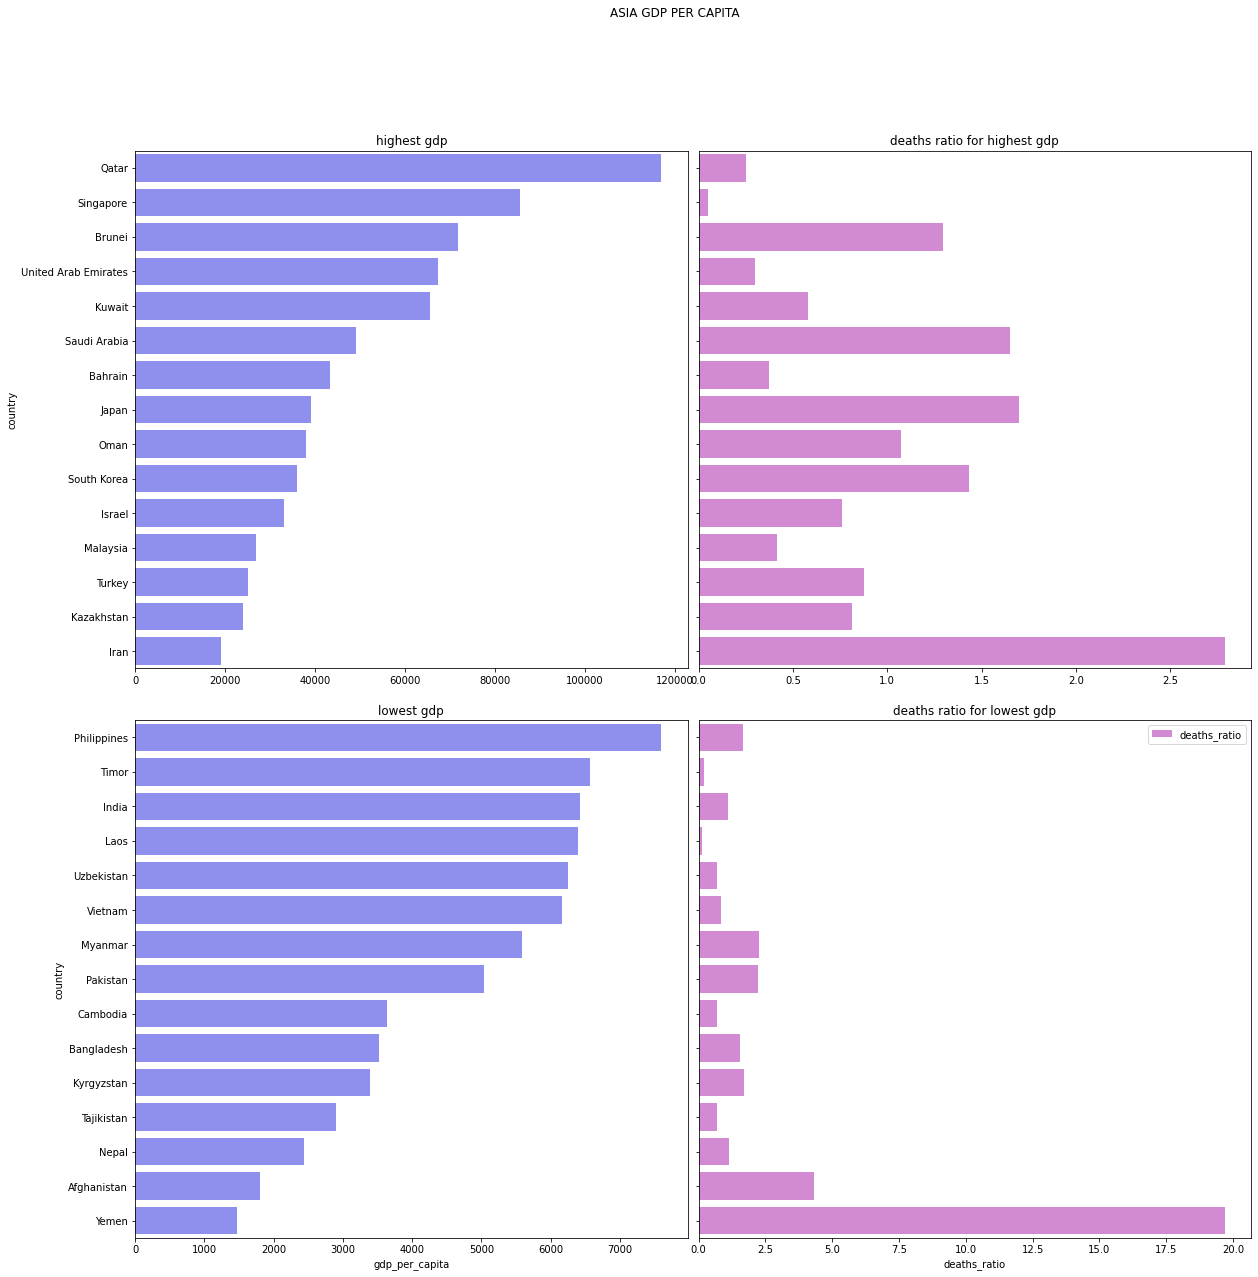

In [38]:
visualizacion_cuatro(asia.sort_values("gdp_per_capita", ascending=False), 'ASIA GDP PER CAPITA', 'gdp_per_capita', 'deaths_ratio', 'country', "highest gdp", "deaths ratio for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", 15)

#### AFRICA

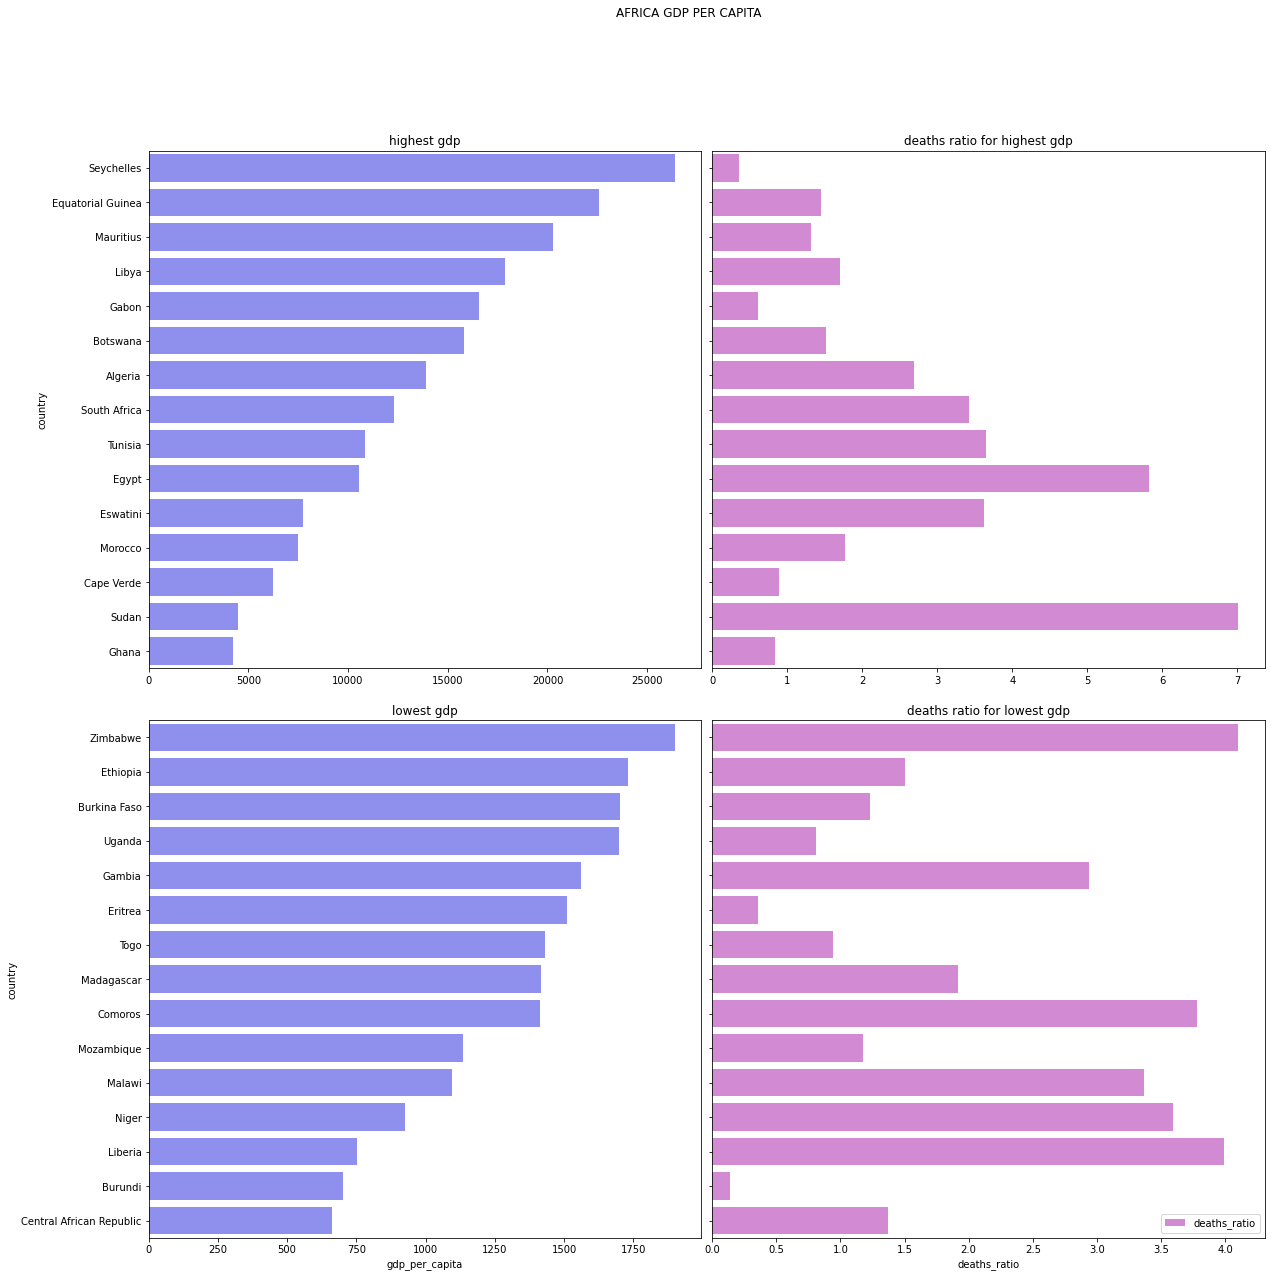

In [39]:
visualizacion_cuatro(africa.sort_values("gdp_per_capita", ascending=False), 'AFRICA GDP PER CAPITA', 'gdp_per_capita', 'deaths_ratio', 'country', "highest gdp", "deaths ratio for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", 15)

#### NORTH AMERICA

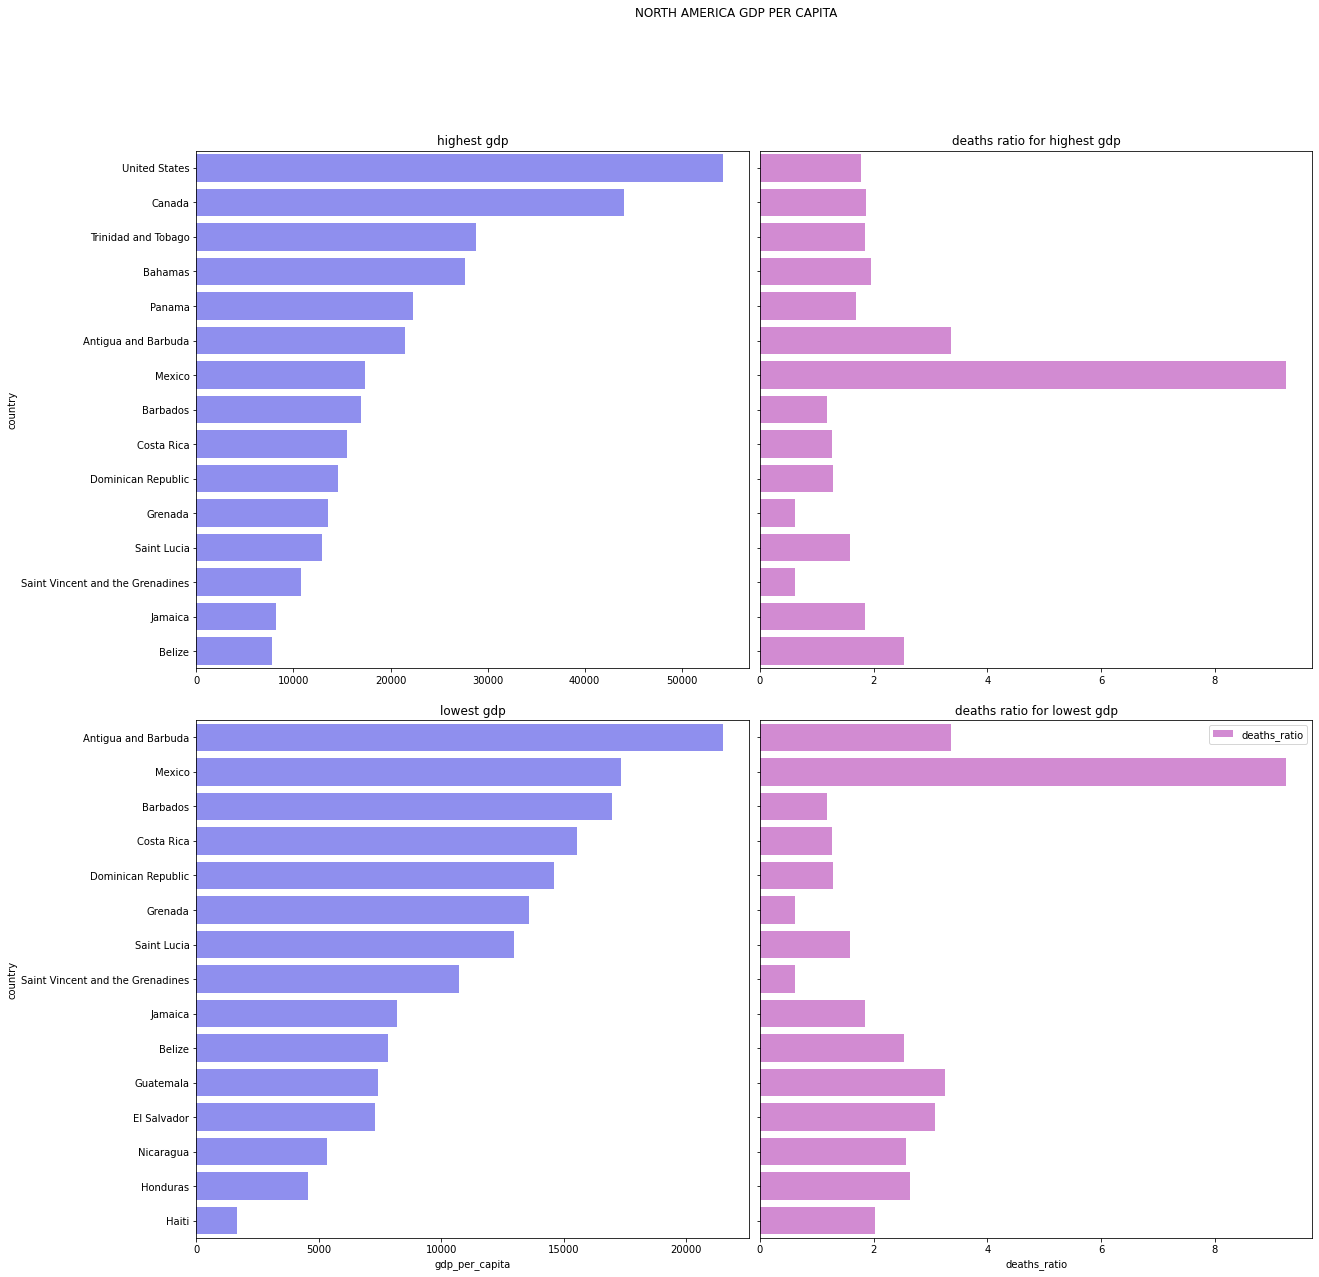

In [40]:
visualizacion_cuatro(north_america.sort_values("gdp_per_capita", ascending=False), 'NORTH AMERICA GDP PER CAPITA', 'gdp_per_capita', 'deaths_ratio', 'country', "highest gdp", "deaths ratio for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", 15)

#### SOUTH AMERICA

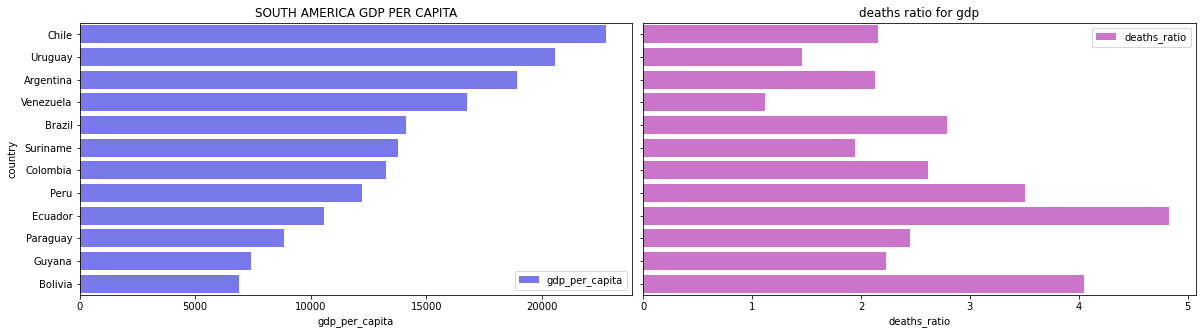

In [41]:
subplot_bar("gdp_per_capita", "deaths_ratio", "country", south_america.sort_values("gdp_per_capita", ascending=False), "SOUTH AMERICA GDP PER CAPITA", "deaths ratio for gdp", 20, 10)

#### OCEANIA

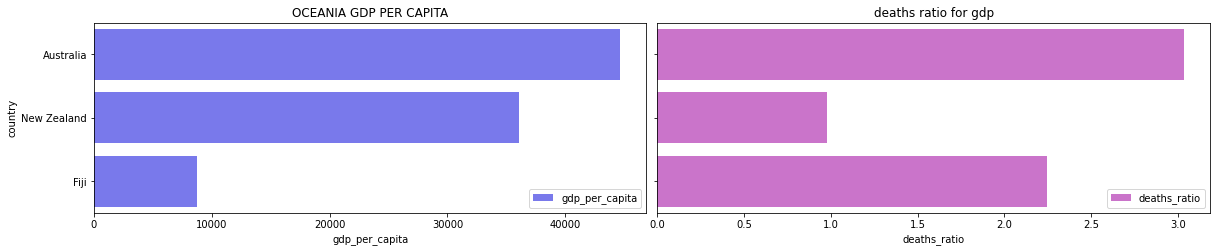

In [42]:
subplot_bar("gdp_per_capita", "deaths_ratio", "country", oceania.sort_values("gdp_per_capita", ascending=False), "OCEANIA GDP PER CAPITA", "deaths ratio for gdp", 20, 7)

#### WORLD

This graph compares gdp per capita and the deaths ratio sorted by gdp per capita of the world.
For the values we've selected the top five highest and lowest gdp per continent because if we select the top twenty highest and lowest of all world directly the comparation wouldn't be representative. 

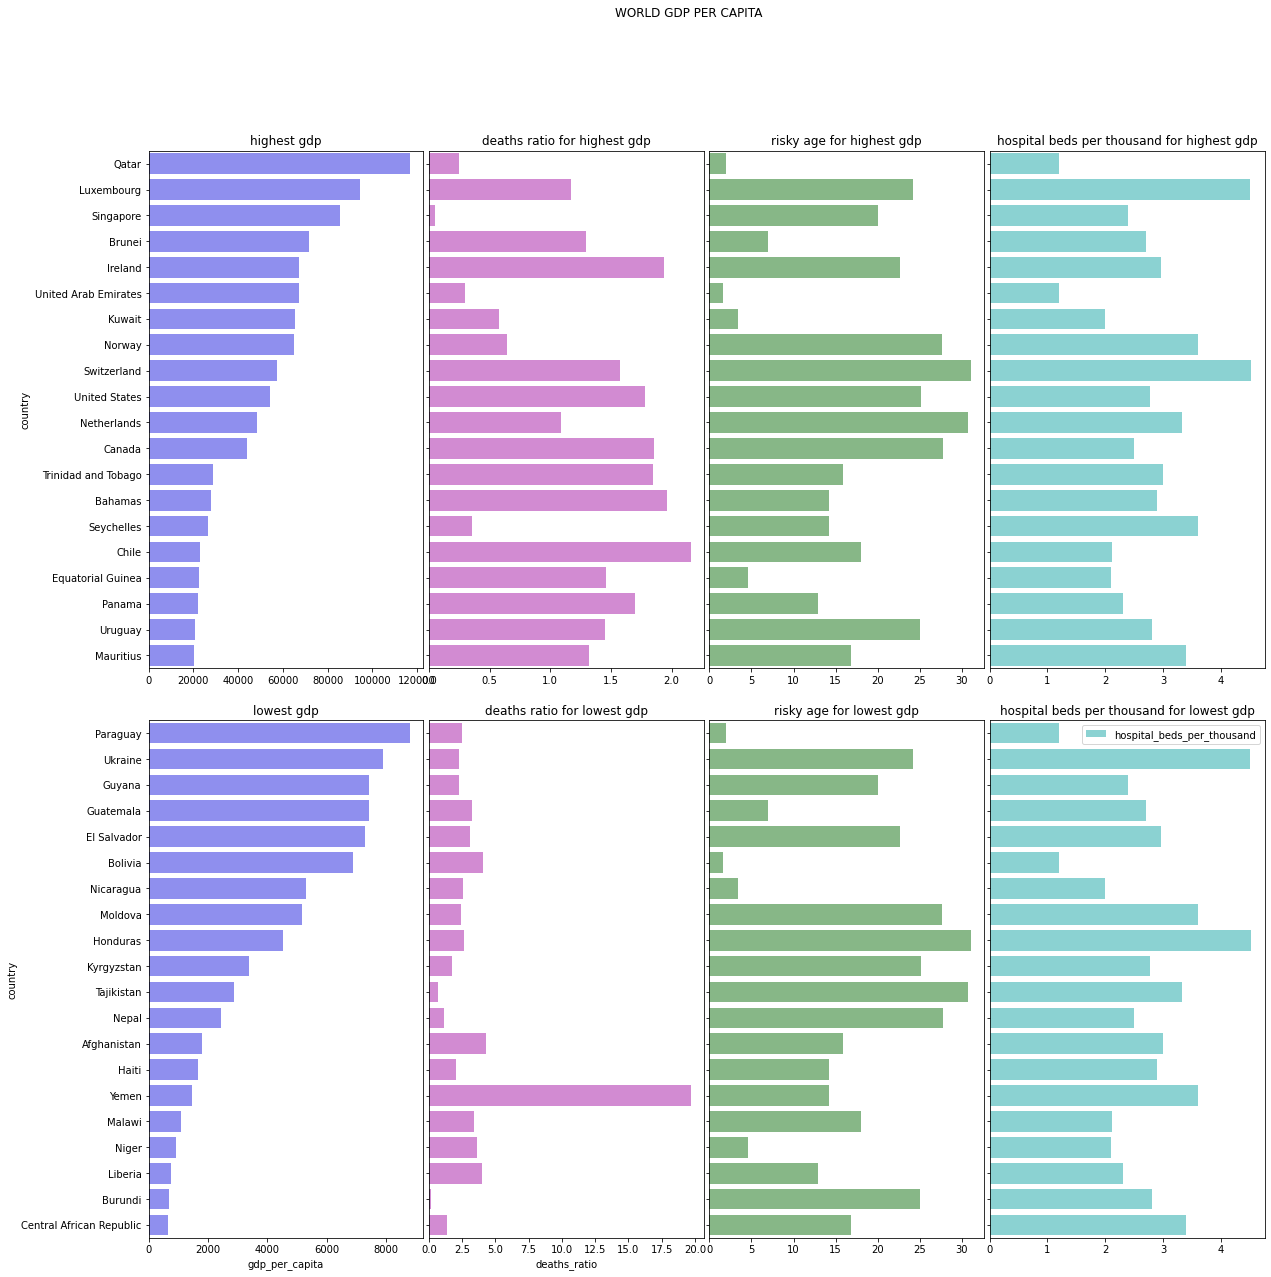

In [43]:
visualizacion_eight(s_gdp_world, 'WORLD GDP PER CAPITA', "gdp_per_capita", "deaths_ratio", "risky_age", "hospital_beds_per_thousand", "country", "highest gdp", "deaths ratio for highest gdp","risky age for highest gdp", "hospital beds per thousand for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", "risky age for lowest gdp", "hospital beds per thousand for lowest gdp", 20, 20, 20 )

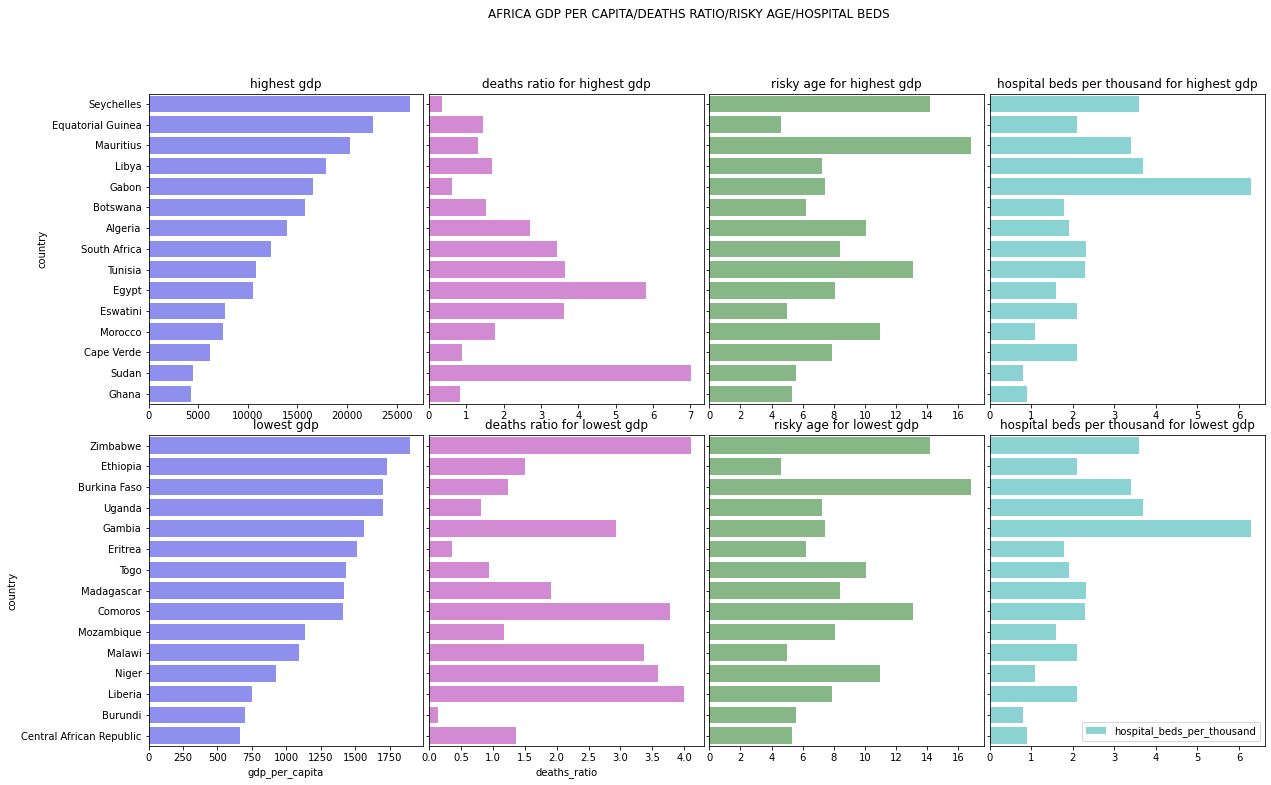

In [44]:
visualizacion_eight(africa.sort_values("gdp_per_capita", ascending=False), 'AFRICA GDP PER CAPITA/DEATHS RATIO/RISKY AGE/HOSPITAL BEDS', "gdp_per_capita", "deaths_ratio", "risky_age", "hospital_beds_per_thousand", "country", "highest gdp", "deaths ratio for highest gdp","risky age for highest gdp", "hospital beds per thousand for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", "risky age for lowest gdp", "hospital beds per thousand for lowest gdp", 15, 20, 12)

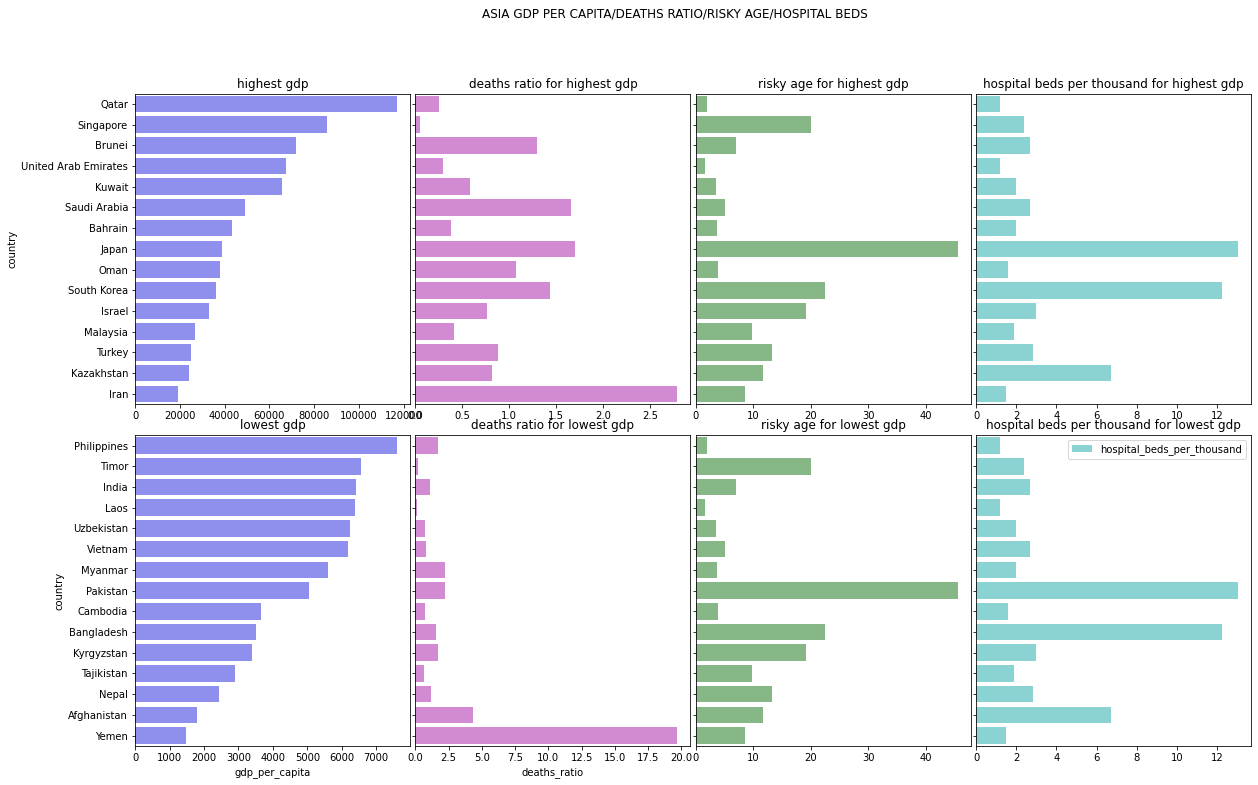

In [45]:
visualizacion_eight(asia.sort_values("gdp_per_capita", ascending=False), 'ASIA GDP PER CAPITA/DEATHS RATIO/RISKY AGE/HOSPITAL BEDS', "gdp_per_capita", "deaths_ratio", "risky_age", "hospital_beds_per_thousand", "country", "highest gdp", "deaths ratio for highest gdp","risky age for highest gdp", "hospital beds per thousand for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", "risky age for lowest gdp", "hospital beds per thousand for lowest gdp", 15, 20, 12)

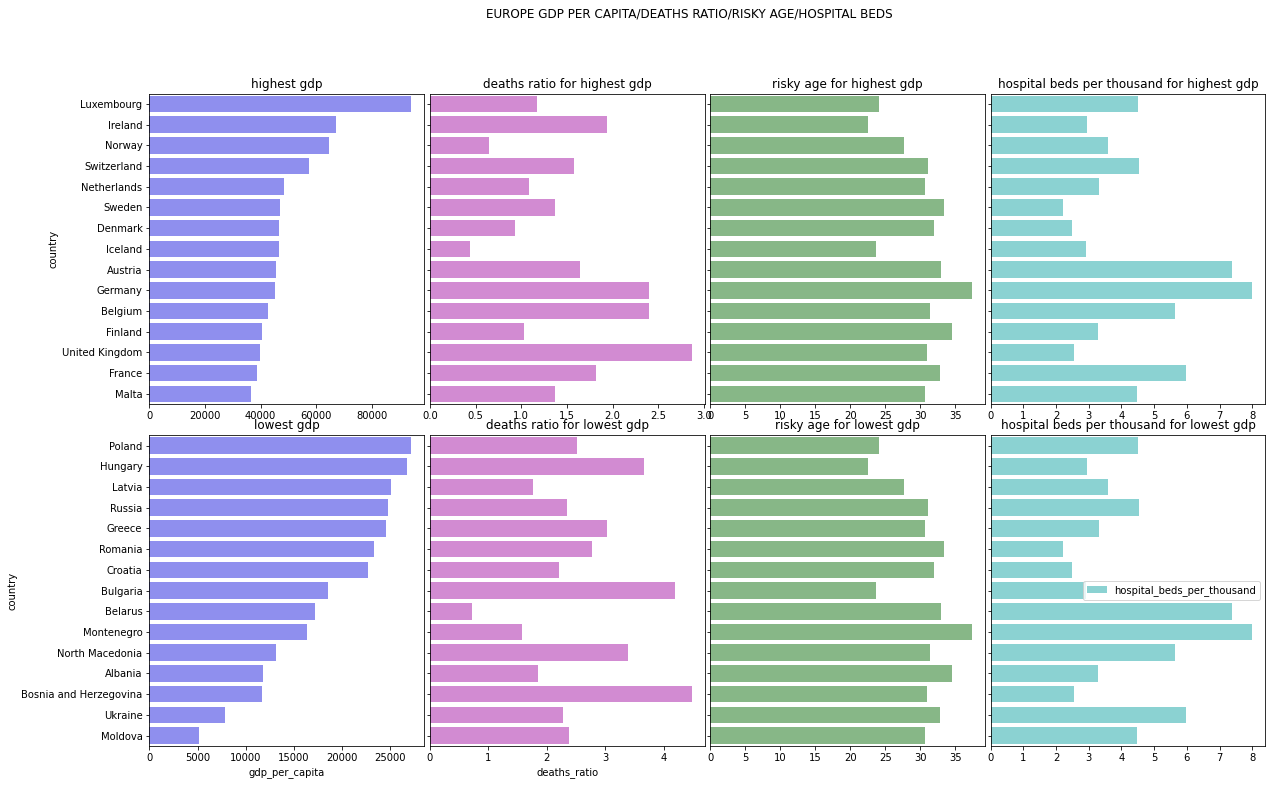

In [46]:
visualizacion_eight(europe.sort_values("gdp_per_capita", ascending=False), 'EUROPE GDP PER CAPITA/DEATHS RATIO/RISKY AGE/HOSPITAL BEDS', "gdp_per_capita", "deaths_ratio", "risky_age", "hospital_beds_per_thousand", "country", "highest gdp", "deaths ratio for highest gdp","risky age for highest gdp", "hospital beds per thousand for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", "risky age for lowest gdp", "hospital beds per thousand for lowest gdp", 15, 20, 12)

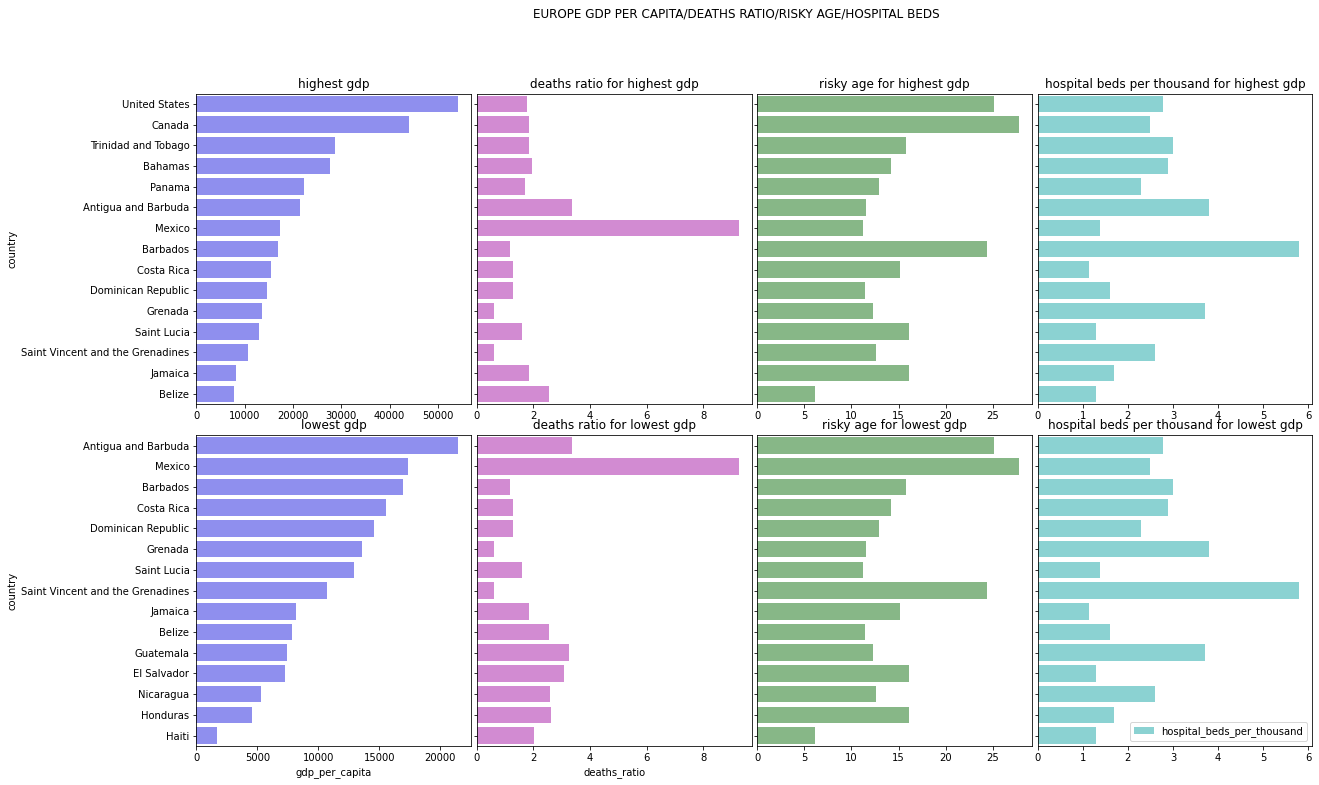

In [47]:
visualizacion_eight(north_america.sort_values("gdp_per_capita", ascending=False), 'EUROPE GDP PER CAPITA/DEATHS RATIO/RISKY AGE/HOSPITAL BEDS', "gdp_per_capita", "deaths_ratio", "risky_age", "hospital_beds_per_thousand", "country", "highest gdp", "deaths ratio for highest gdp","risky age for highest gdp", "hospital beds per thousand for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", "risky age for lowest gdp", "hospital beds per thousand for lowest gdp", 15, 20, 12)

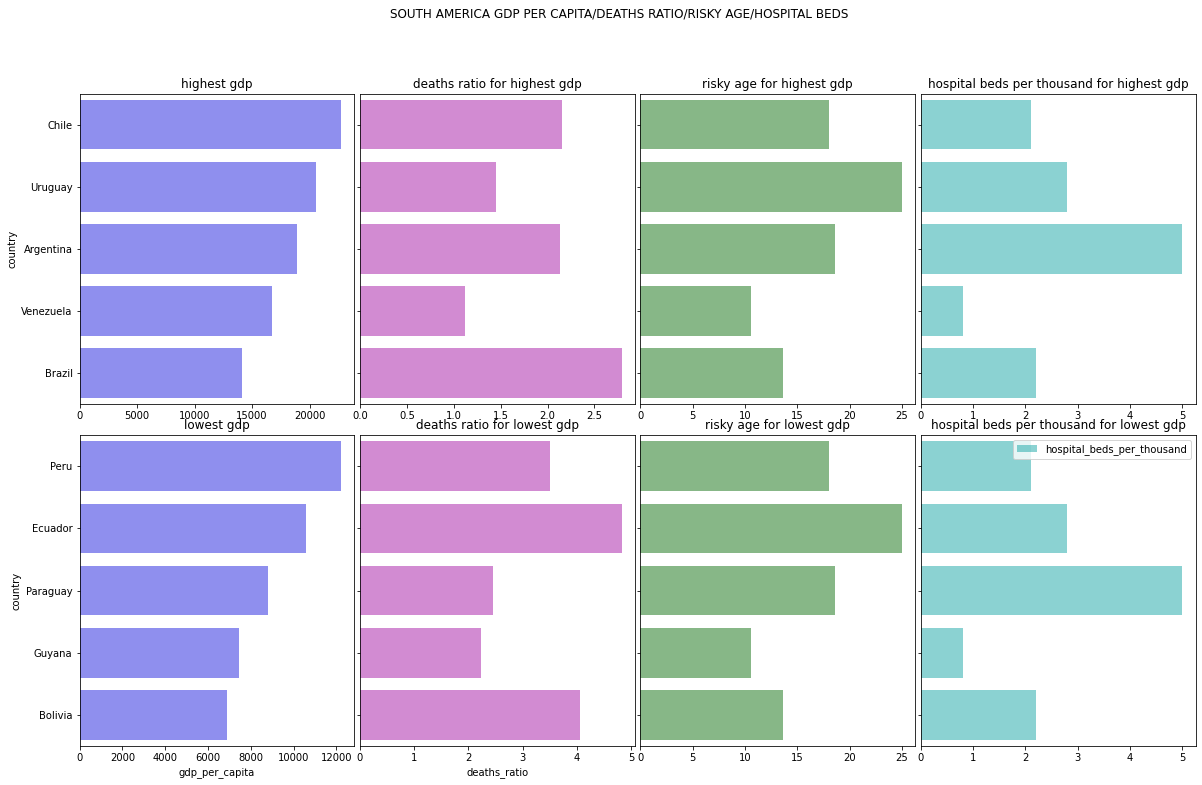

In [48]:
visualizacion_eight(south_america.sort_values("gdp_per_capita", ascending=False), 'SOUTH AMERICA GDP PER CAPITA/DEATHS RATIO/RISKY AGE/HOSPITAL BEDS', "gdp_per_capita", "deaths_ratio", "risky_age", "hospital_beds_per_thousand", "country", "highest gdp", "deaths ratio for highest gdp","risky age for highest gdp", "hospital beds per thousand for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", "risky age for lowest gdp", "hospital beds per thousand for lowest gdp", 5, 20, 12)

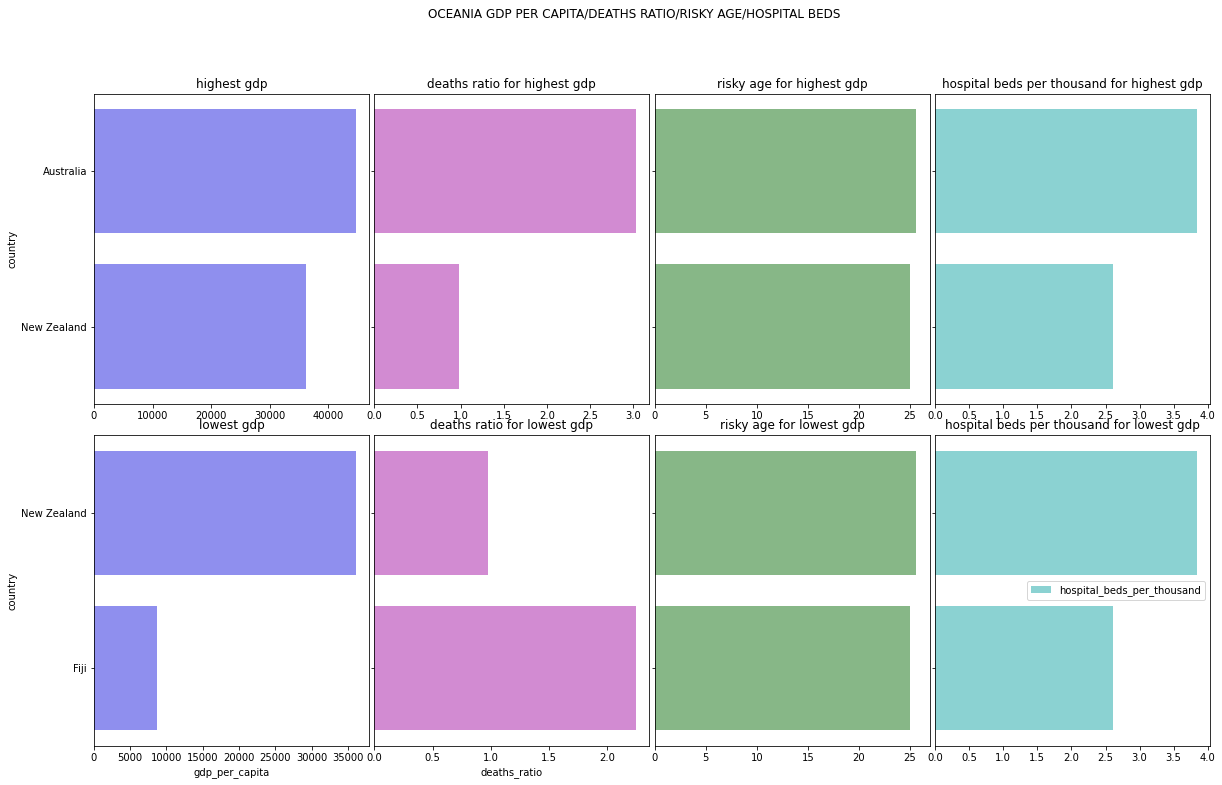

In [49]:
visualizacion_eight(oceania.sort_values("gdp_per_capita", ascending=False), 'OCEANIA GDP PER CAPITA/DEATHS RATIO/RISKY AGE/HOSPITAL BEDS', "gdp_per_capita", "deaths_ratio", "risky_age", "hospital_beds_per_thousand", "country", "highest gdp", "deaths ratio for highest gdp","risky age for highest gdp", "hospital beds per thousand for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", "risky age for lowest gdp", "hospital beds per thousand for lowest gdp", 2, 20,12)

### SCATTER PLOT

This graph compares the relation between gdp_per capita and risky_age and shows the deaths ratio by size of the circles

In [50]:
scatter(covid_groupby,"gdp_per_capita" , "risky_age", "deaths_ratio", "deaths_ratio by gdp and risky age")

In [51]:
scatter(covid_groupby,"Poverty %" , "risky_age", "deaths_ratio", "deaths_ratio by poverty and risky age")

In [52]:
scatter(covid_groupby,"gdp_per_capita" , "hospital_beds_per_thousand", "deaths_ratio", "deaths_ratio by dgp per capita and risky age")

# HISTOGRAMS

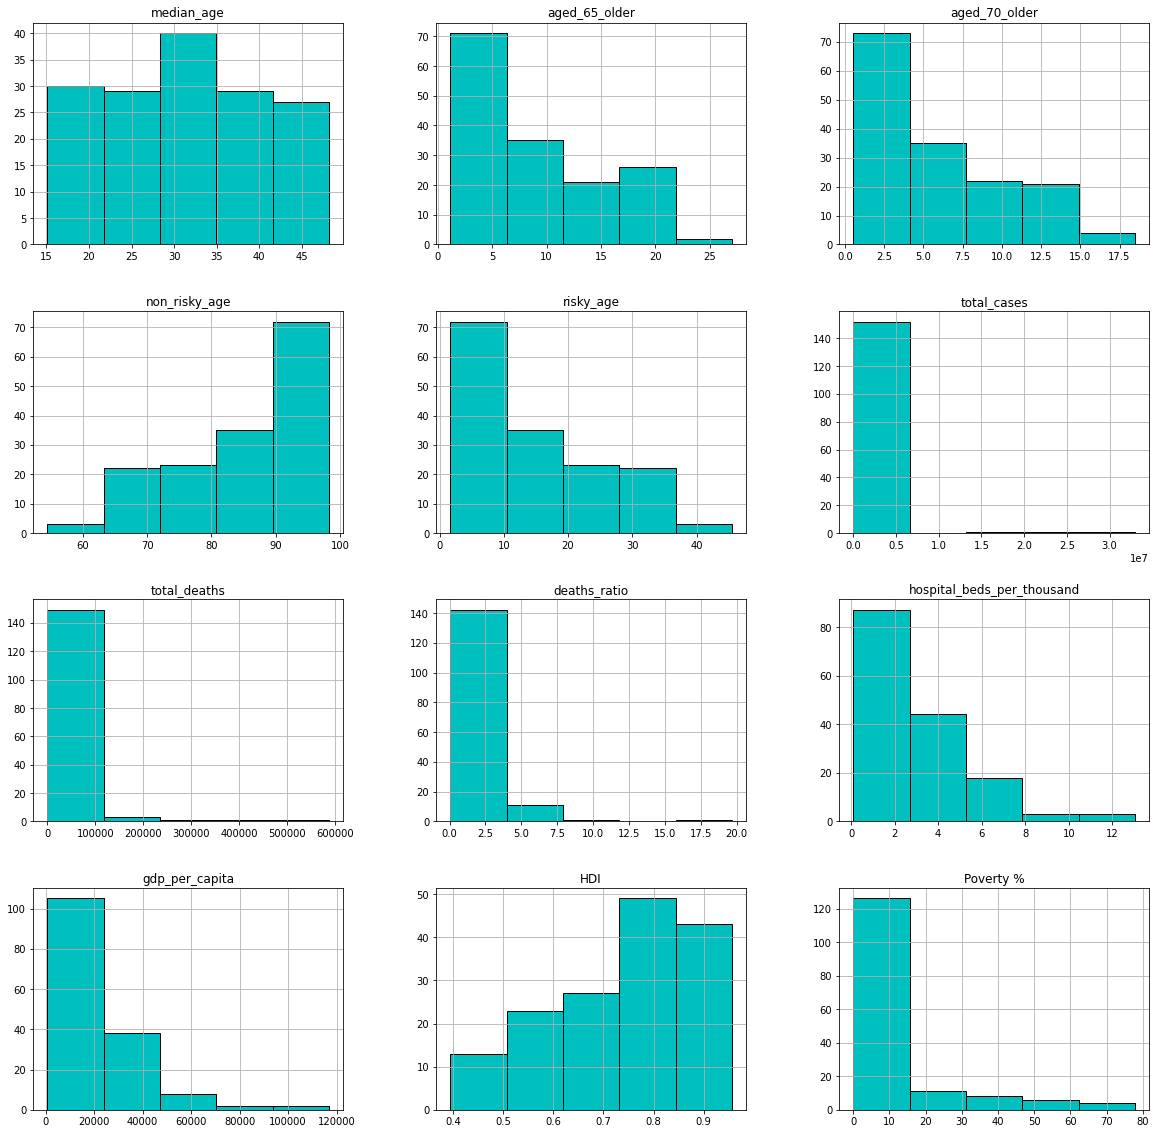

In [53]:
tendencias(covid_groupby)

# CONCLUSIONS

#### QUESTIONS 

*a. Was it possible to deamostrate the hypothesis? Why?*

The hypothesis has been partly demostrated as we have been working with all data without separating each parameter to achieve the best demostration as the time that we had to do the project was not very long.

*b. What can you conclude about your data study?*

The hypotesis has been rejected because in the information given by the data we have seen that the death rate in countries where the gdp per capita is very low isn´t higher than the countries where the gdp per capita is very elevated in most of cases.

*c. What would you change if you need to do another EDA project?*

If I would have to do another EDA project I would change a lot of things. 
First of all I would choose a topic in which I have more interest, and then I would use questions as tools to guide the investigation to develop an understanding of the data.


*d. What do you learn doing this project?*

Doing this project I have learnt to calm down and to control the stress and also I have learnt that I have to schedule my time better and priorize somethings over others.

As to theory I have learnt a lot of things such as detecting errors of my code faster, finding solutions on my own or how to be more effective coding.




# WORKING TIME

This pie plot shows more or less the time that I have spent in each part of the poject.

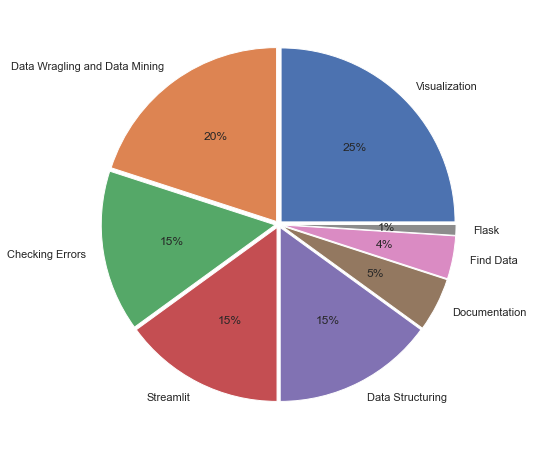

In [54]:
working_time()